#**Udacity: Introduction to TensorFlow for Deep Learning**

## Lesson 4

In this colab notebook, you would learn to **build and train a convolutional neural network to classify clothing** from the fashion mnist data.

**Concept introduced**
1. Building a convolutional neural network

   

***Try to do model analysis***
- What is the model's performance during training?
- How does the validation change during training
- Try early stopping with X amount of epochs?

## Import dependencies

- Install tensorflow
- Install tensorflow datasets

In [ ]:
!pip install -U  tensorflow_datasets

In [ ]:
import tensorflow as tf

import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)

2.5.0


## Get the Data and prepare it for the model training

In [ ]:
# Load the fashion mnsit dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# get the training and test dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# display information about training and test dataset
print('Shape of training image: {}'.format(train_images.shape))
print('Shape of training image label: {}'.format(train_labels.shape))


Shape of training image: (60000, 28, 28)
Shape of training image label: (60000,)


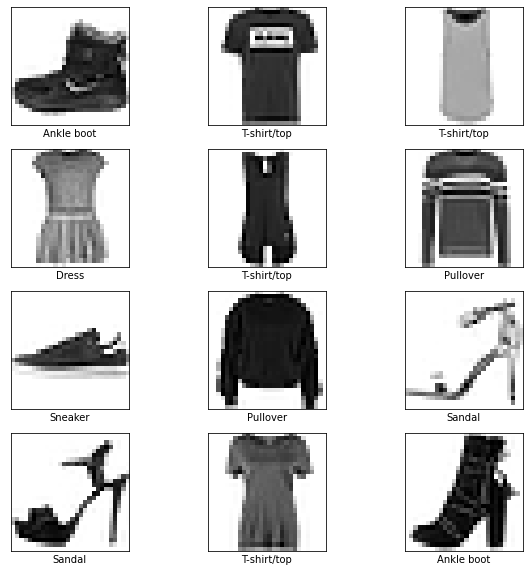

In [ ]:
# plot a single sample from the training dataset
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Scaledown the image
train_images = train_images/255.0
test_images = test_images/255.0


So tensorflow is complaining because the shape of the input data is (6000, 28, 28) and I've defined an input shape of (28, 28, 1) for the first convolution layer.

Looking at the tutorial i followed to download the fashion mnsit data into a numpy array and not a tensorflow.python.data.ops.dataset_ops.PrefetchDataset.

Having the data as a numpy array is easier for me to understand so why can't i feed it to the first layer (convolution layer)?

What they did in the [example](https://www.tensorflow.org/tutorials/keras/classification) they used an `input shape = (28, 28)` which makes sense looking at the docs for the [dense layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense#input_shape_2)
But for the [Conv2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D#input_shape_2) it expects a 4+D tensor with shape: batch_shape + (channels, rows, cols) So we are missing the channel dimension.

Perhaps we can resolve this by adding a 4th dimension so that the shape of the numpy array is now `(6000, 28, 28, 1)`

### OMD
Potential resource [Channels-First & Channels-Last](https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/)

Summary
- 2 ways to represent image data as 3d arrays
  - Channel first: color channel as the first dimension
  - Channel last: color channel as the last dimension.
- Typically image format has one dimension for rows and one for coloum and one for channl.
- If image is black and white, the channels dimension might not be explictly represented **(my problem)**
- Colored image typically have 3 channels for RGB component
- Deep learning neural network require image data to be provided as 3d arrays, and to make things complicated, some libraries prefer channel first and other prefer channel last ordering.

   
Suggested solution: 
- numpy expand_dims
- numpy.reshape

In [ ]:
Dummy_training_images = train_images

print(Dummy_training_images.shape)

# changing the dimension using reshape
Dummy_training_images2 = Dummy_training_images.reshape((60000,28,28,1))
print(Dummy_training_images2.shape)

# changing the dimension using expand_dims
from numpy import expand_dims
Dummy_training_images3 = expand_dims(Dummy_training_images, axis=3)
print(Dummy_training_images3.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(60000, 28, 28, 1)


:)
Lets try using Dummy_training_images2 & 3 to train the model.

## Build the CNN model

Structure of CNN model
- Includes at least a convolutional layer and a pooling layer pair for feature learning.


In [ ]:
# define the model
cnn = tf.keras.Sequential()

# Add the feature learning layers for the model
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation=tf.keras.activations.relu, input_shape=(28, 28, 1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# Add the classification layer for the model
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu))
cnn.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))


In [ ]:
# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

## Train the model on the training dataset

In [ ]:
# train the model on the training dataset with a validation split of 0.2 an epoch of 70 and shuffle the data before each epoch
history = cnn.fit(Dummy_training_images2, train_labels, epochs=70,
                  validation_split=0.2, shuffle=True)

Epoch 1/70
1500/1500 [==============================] - 36s 3ms/step - loss: 0.4557 - accuracy: 0.8369 - val_loss: 0.3242 - val_accuracy: 0.8820
Epoch 2/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2991 - accuracy: 0.8916 - val_loss: 0.2815 - val_accuracy: 0.8976
Epoch 3/70
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2522 - accuracy: 0.9086 - val_loss: 0.2565 - val_accuracy: 0.9047
Epoch 4/70
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2222 - accuracy: 0.9201 - val_loss: 0.2504 - val_accuracy: 0.9079
Epoch 5/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1969 - accuracy: 0.9269 - val_loss: 0.2483 - val_accuracy: 0.9107
Epoch 6/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1733 - accuracy: 0.9371 - val_loss: 0.2392 - val_accuracy: 0.9141
Epoch 7/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1534 - accuracy: 0.9434 - val_loss: 0.2420 - val_accuracy

:) :) :)
 it works.

## Model Analysis
Plot a graph of the models performance during training 


In [ ]:
print(history.history['loss'])

[0.45572736859321594, 0.29905346035957336, 0.2521589696407318, 0.22220584750175476, 0.19686244428157806, 0.1733195036649704, 0.15343275666236877, 0.1371724158525467, 0.1193004846572876, 0.1048475056886673, 0.09116125851869583, 0.07929308712482452, 0.0702507346868515, 0.06352770328521729, 0.053912729024887085, 0.04869452491402626, 0.04382350295782089, 0.041200410574674606, 0.0365135483443737, 0.0342857725918293, 0.029158299788832664, 0.027861060574650764, 0.027625054121017456, 0.026243817061185837, 0.024001749232411385, 0.024568062275648117, 0.02198942005634308, 0.021484890952706337, 0.019530681893229485, 0.021005120128393173, 0.021924138069152832, 0.017077269032597542, 0.02235742099583149, 0.013311157003045082, 0.020369645208120346, 0.016465960070490837, 0.017924658954143524, 0.018658297136425972, 0.014582105912268162, 0.016500601544976234, 0.018791133537888527, 0.012394829653203487, 0.018053025007247925, 0.012078863568603992, 0.018254848197102547, 0.012455807998776436, 0.0143857421353

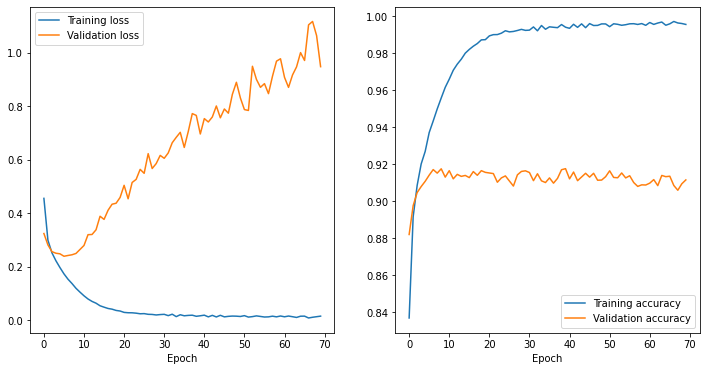

In [ ]:
plt.figure(figsize=(12,6))

# plot the model's loss on the training and validation set per epoch
plt.subplot(1,2,1)
plt.plot(range(70), history.history['loss'], label='Training loss') # training loss vs epoch
plt.plot(range(70), history.history['val_loss'], label='Validation loss') # validation loss vs epoch
plt.xlabel('Epoch')
plt.legend()

# Plot the model's accuracy on the training and validation set per epoch
plt.subplot(1,2,2)
plt.plot(range(70), history.history['accuracy'], label='Training accuracy') # training accuracy vs epoch
plt.plot(range(70), history.history['val_accuracy'], label='Validation accuracy') # validation accuracy vs epoch
plt.xlabel('Epoch')
plt.legend()
plt.show()


So looking at the plot, it might have been better to stop training the model around 10 epochs and 70 epochs was a bit of an overkill.


I want to see if i can implement early stopping, so so that model training stops when validation loss begins to increase.

example implementation here
[Utube link](https://www.youtube.com/watch?v=-vHQub0NXI4)

Required solution
- `early_stop = keras.callbacks.EarlyStopping(monitor='X', patience=10')`
- in the fit function `model.fit(... callbacks=early_stop)`

*To the docs*   
[EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [35]:
# define the model
cnn_mark2 = tf.keras.Sequential()

# Add the feature learning layers for the model
cnn_mark2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation=tf.keras.activations.relu, input_shape=(28, 28, 1)))
cnn_mark2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn_mark2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation=tf.keras.activations.relu))
cnn_mark2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# Add the classification layer for the model
cnn_mark2.add(tf.keras.layers.Flatten())
cnn_mark2.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu))
cnn_mark2.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
cnn_mark2.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

# define the EarlyStopping callback
Early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


Note that the model is trained with the same number of epoch as the previous model

In [36]:
# train the model
history = cnn_mark2.fit(Dummy_training_images3, train_labels, epochs=70,
                  validation_split=0.2, shuffle=True, callbacks=[Early_stop])


Epoch 1/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4359 - accuracy: 0.8433 - val_loss: 0.3225 - val_accuracy: 0.8851
Epoch 2/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.8984 - val_loss: 0.2777 - val_accuracy: 0.8965
Epoch 3/70
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2383 - accuracy: 0.9149 - val_loss: 0.2619 - val_accuracy: 0.9037
Epoch 4/70
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2068 - accuracy: 0.9249 - val_loss: 0.2470 - val_accuracy: 0.9086
Epoch 5/70
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1802 - accuracy: 0.9340 - val_loss: 0.2384 - val_accuracy: 0.9139
Epoch 6/70
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1587 - accuracy: 0.9424 - val_loss: 0.2381 - val_accuracy: 0.9137
Epoch 7/70
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9501 - val_loss: 0.2396 - val_accuracy:

Early Stopping stopped the model training after 16 Epochs.

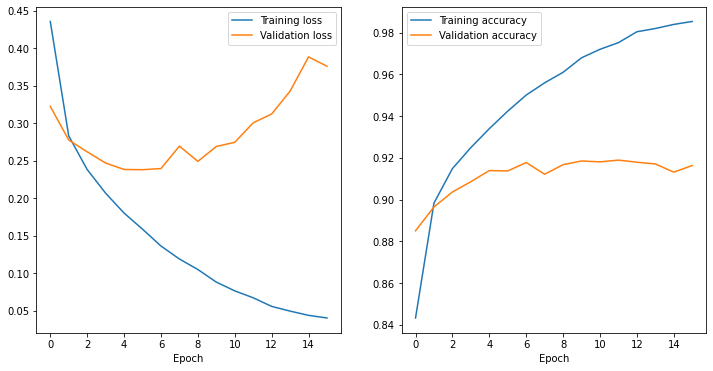

In [38]:
# Display the model's loss and accuracy on the training and validation set.
plt.figure(figsize=(12,6))

# plot the model's loss on the training and validation set per epoch
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], label='Training loss') # training loss vs epoch
plt.plot(history.epoch, history.history['val_loss'], label='Validation loss') # validation loss vs epoch
plt.xlabel('Epoch')
plt.legend()

# Plot the model's accuracy on the training and validation set per epoch
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy') # training accuracy vs epoch
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy') # validation accuracy vs epoch
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Evaluate the performance of the model using the Test set

Compare the performance of both models on the test data.

remember to reshape the test_data

In [41]:
print(test_images.shape)

test_images_reshaped = test_images.reshape((10000, 28, 28, 1))
print(test_images_reshaped.shape)

(10000, 28, 28)
(10000, 28, 28, 1)


In [42]:
model1_loss, model1_accuracy = cnn.evaluate(test_images_reshaped, test_labels, verbose=1)
model2_loss, model2_accuracy = cnn_mark2.evaluate(test_images_reshaped, test_labels, verbose=1 )

313/313 [==============================] - 1s 2ms/step - loss: 0.4149 - accuracy: 0.9128


In [44]:
print('Model 1 Loss: {:.2f} and Accuracy: {:.2f}'.format(model1_loss, model1_accuracy))
print('Model 2 Loss: {:.2f} and Accuracy: {:.2f}'.format(model2_loss, model2_accuracy))

Model 1 Loss: 0.95 and Accuracy: 0.91
Model 2 Loss: 0.41 and Accuracy: 0.91


Okay so that is a bit annoying the accuracy is the same on both model. But the loss on the second model is much smaller. Which i suppose makes sense as we wanted to reduce the loss 